### **Load Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler
plt.style.use("seaborn")

### **Data Collection**

In [2]:
df = pd.read_csv('weatherAUS.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [3]:
df.shape

(145460, 23)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [6]:
round(df.isna().sum()/df.shape[0]*100 , 4)

Date              0.0000
Location          0.0000
MinTemp           1.0209
MaxTemp           0.8669
Rainfall          2.2419
Evaporation      43.1665
Sunshine         48.0098
WindGustDir       7.0989
WindGustSpeed     7.0555
WindDir9am        7.2639
WindDir3pm        2.9066
WindSpeed9am      1.2148
WindSpeed3pm      2.1050
Humidity9am       1.8246
Humidity3pm       3.0984
Pressure9am      10.3568
Pressure3pm      10.3314
Cloud9am         38.4216
Cloud3pm         40.8071
Temp9am           1.2148
Temp3pm           2.4811
RainToday         2.2419
RainTomorrow      2.2460
dtype: float64

In [7]:
df.duplicated().sum()

0

In [8]:
df.nunique()

Date             3436
Location           49
MinTemp           389
MaxTemp           505
Rainfall          681
Evaporation       358
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       546
Pressure3pm       549
Cloud9am           10
Cloud3pm           10
Temp9am           441
Temp3pm           502
RainToday           2
RainTomorrow        2
dtype: int64

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


### **Exploratory Data Analysis**

In [10]:
df['Date']= pd.to_datetime(df['Date'])

In [11]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.weekday
df['Day'] = df['Date'].dt.day

**DataType EDA**

In [12]:
categorical_eda = df[['Location', 'WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']]

In [13]:
numerical_eda= df[['MinTemp','MaxTemp','Rainfall','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm']]

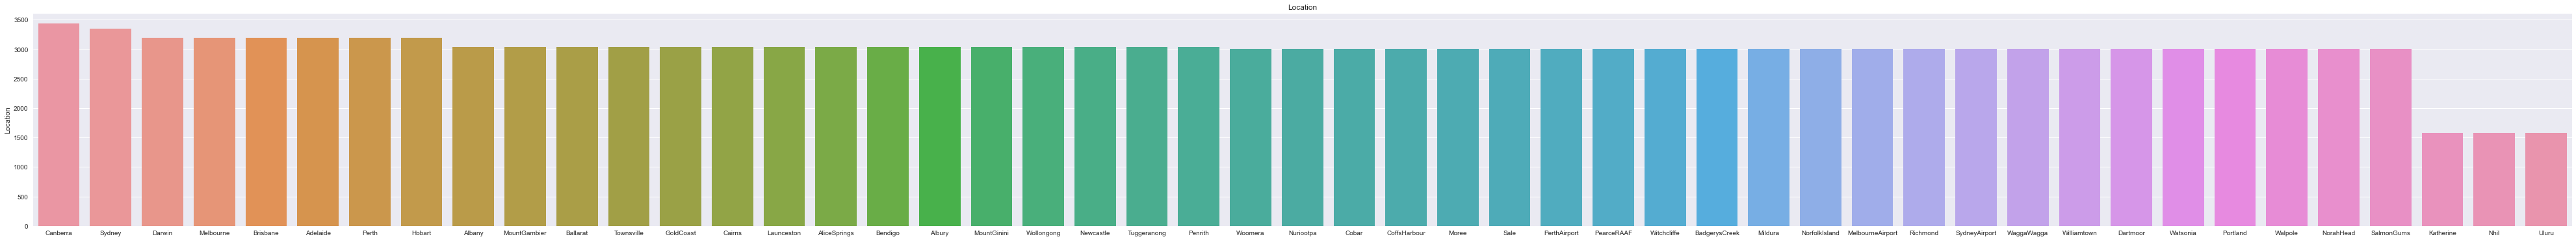

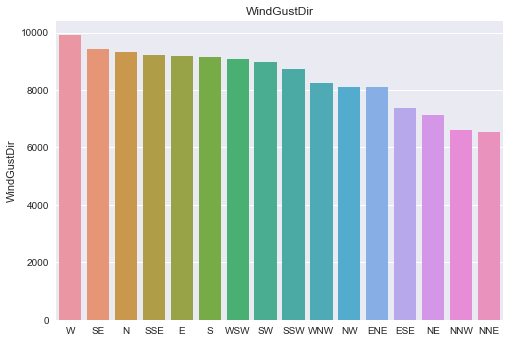

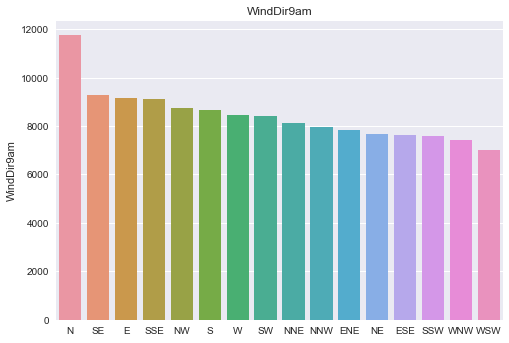

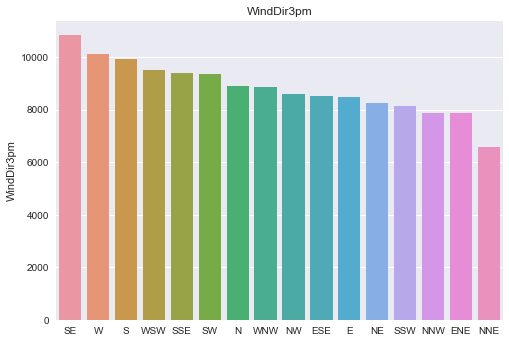

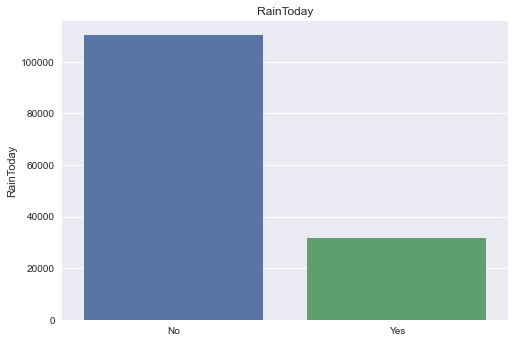

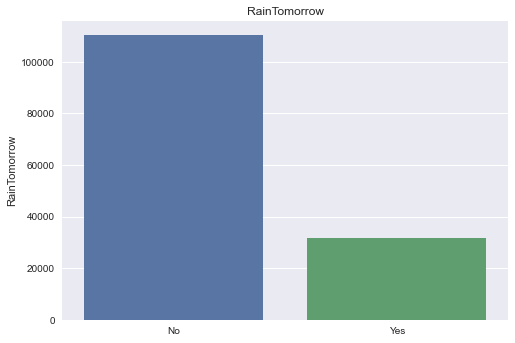

In [14]:
plt.figure(figsize=(70, 6))

for item in categorical_eda:
    sns.barplot(x=categorical_eda[item].value_counts().index, y=categorical_eda[item].value_counts())
    plt.title(item)
    plt.show()

In [15]:
plt.figure(figsize=(70, 6))

<Figure size 5040x432 with 0 Axes>

<Figure size 5040x432 with 0 Axes>

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


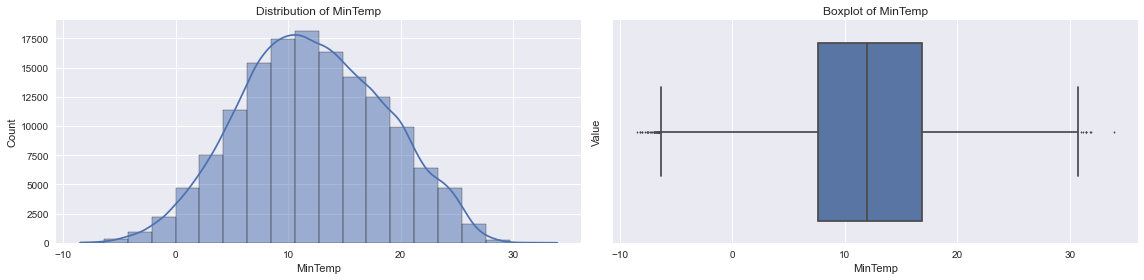

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


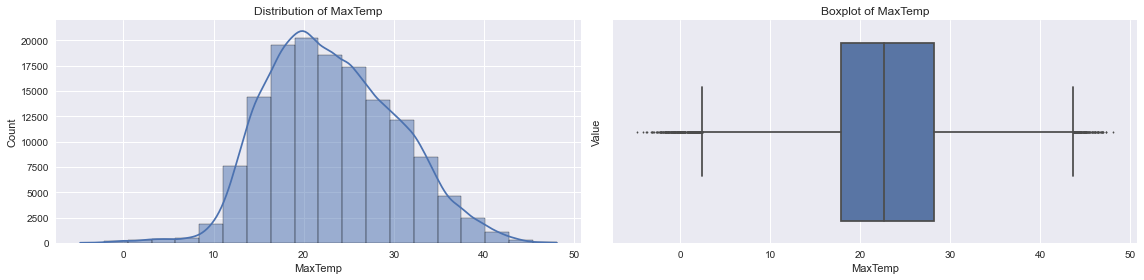

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


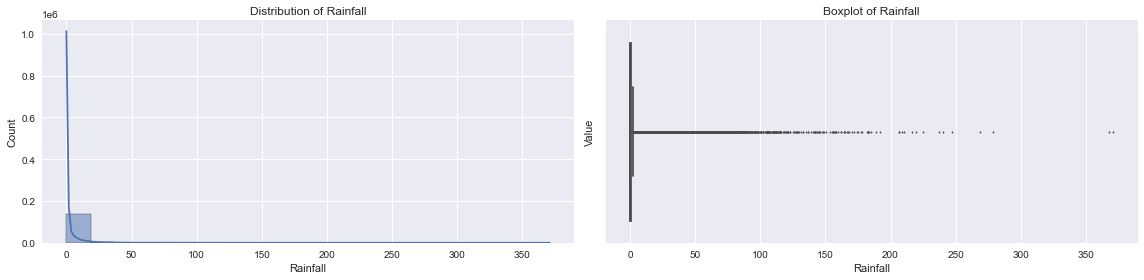

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


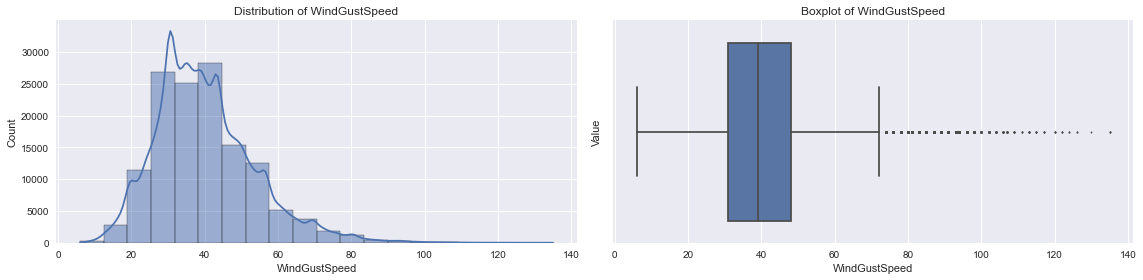

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


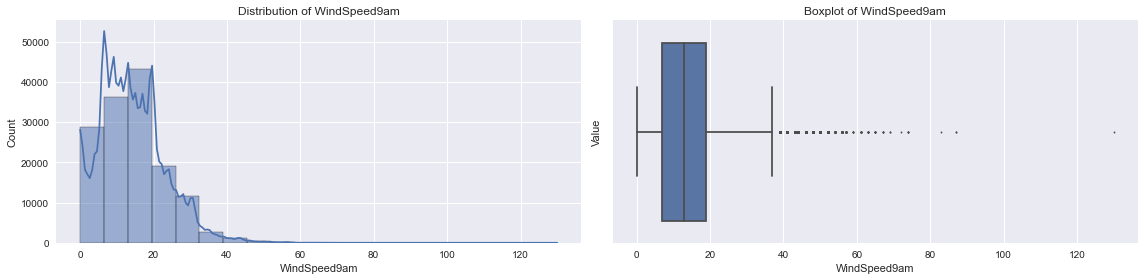

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


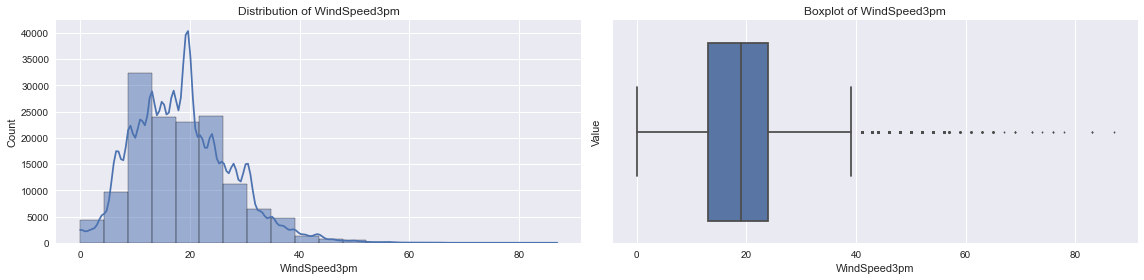

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


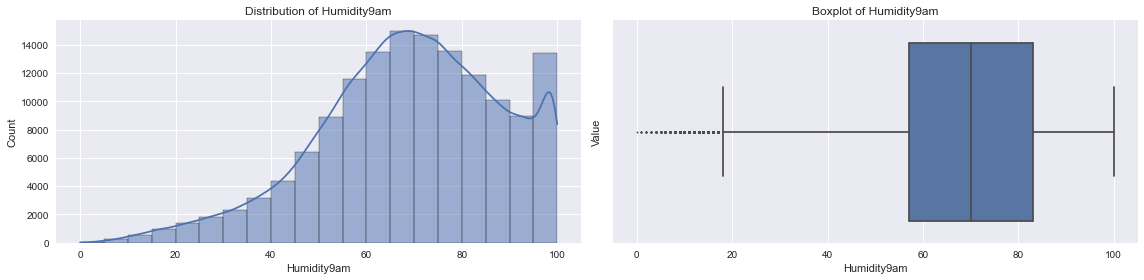

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


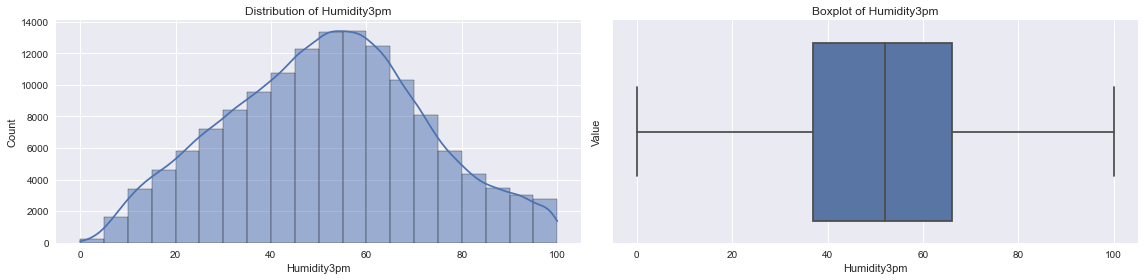

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


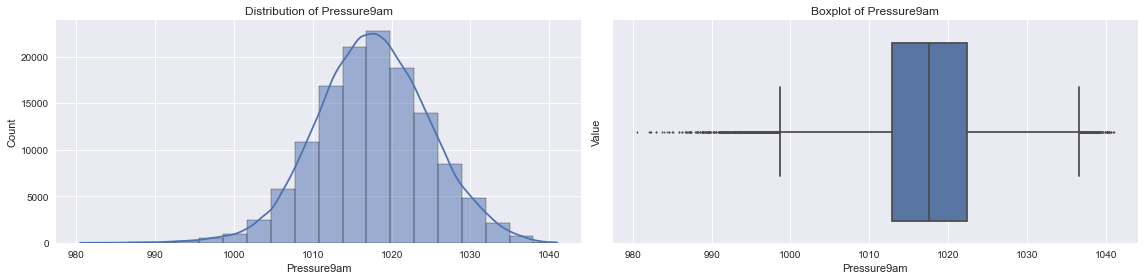

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


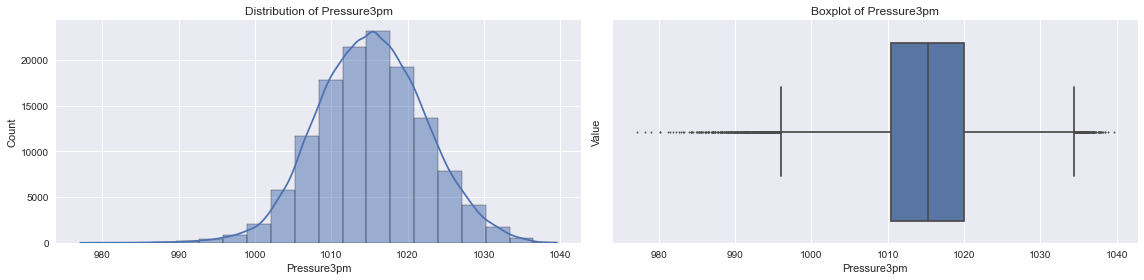

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


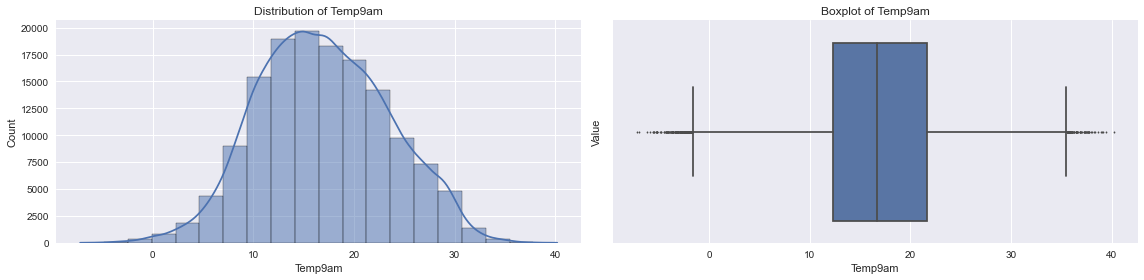

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


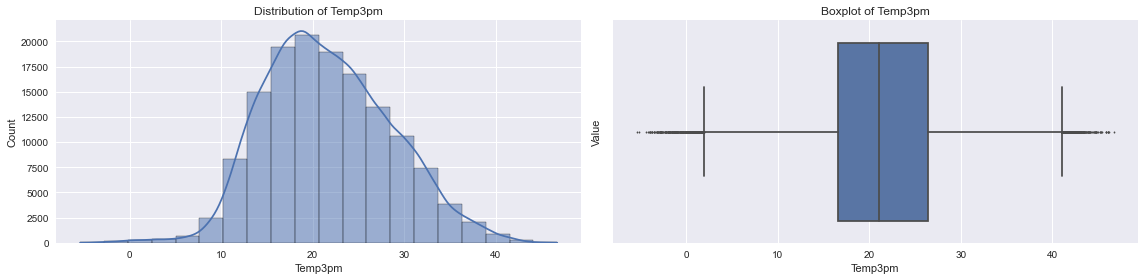

In [16]:
for col in numerical_eda:
    fig, ax = plt.subplots(1, 2, figsize=(16, 4))

    sns.histplot(df[col], bins=20, kde=True, ax=ax[0])
    ax[0].set_xlabel(col)
    ax[0].set_ylabel("Count")
    ax[0].set_title(f"Distribution of {col}")

    sns.boxplot(df[col], fliersize=1, ax=ax[1])
    ax[1].set_xlabel(col)
    ax[1].set_ylabel("Value")
    ax[1].set_title(f"Boxplot of {col}")

    plt.tight_layout()
    plt.show()


**Bivariate Analysis**

Year 2007 has the most rainfall and year 2014 has the least rainfall

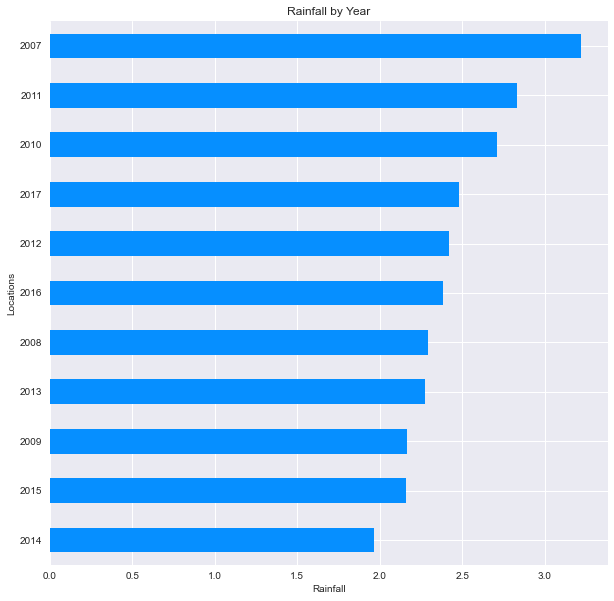

In [17]:
plt.figure(figsize=(10, 10))

location_rain = df.groupby('Year')['Rainfall'].mean()\
                                                 .sort_values()\
                                                 .plot(kind='barh', color= '#068FFF')

plt.title('Rainfall by Year')
plt.xlabel('Rainfall', fontsize=10)
plt.ylabel('Locations', fontsize=10)
plt.show()

February experienced highest rainfall while September experiences the least.

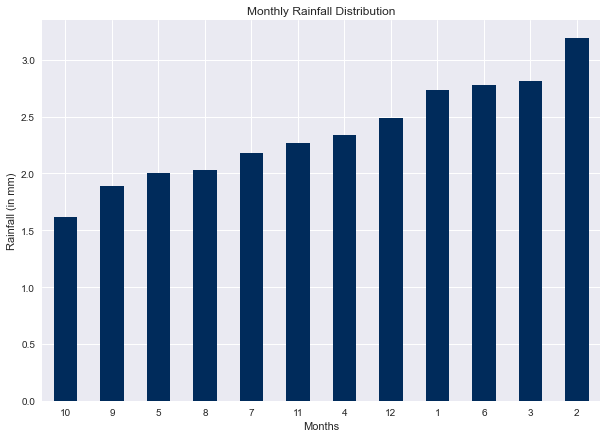

In [18]:
plt.figure(figsize=(10,7))
df.groupby('Month')['Rainfall'].mean()\
                               .sort_values()\
                               .plot(kind='bar', color= '#002B5B')

plt.title('Monthly Rainfall Distribution', fontsize=12)
plt.xlabel('Months')
plt.ylabel('Rainfall (in mm)')

plt.xticks(rotation=0)

plt.show()

31st and 4th of all months received the highest rainfall, the 9th received the least.

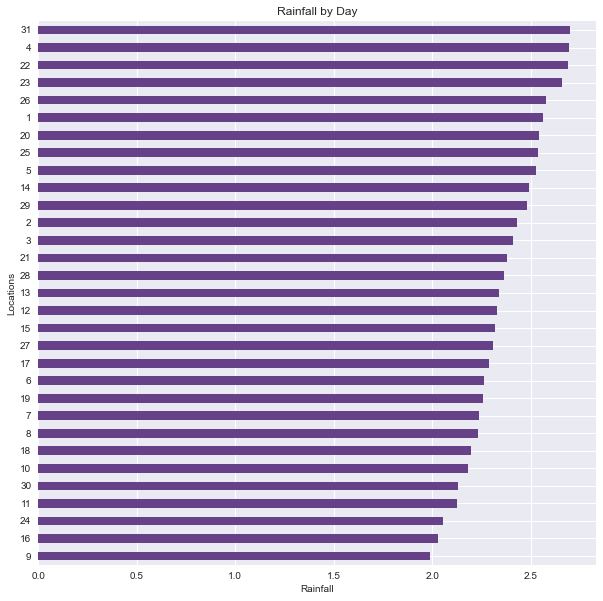

In [19]:
plt.figure(figsize=(10, 10))

location_rain = df.groupby('Day')['Rainfall'].mean()\
                                                 .sort_values()\
                                                 .plot(kind='barh', color= '#674188')

plt.title('Rainfall by Day')
plt.xlabel('Rainfall', fontsize=10)
plt.ylabel('Locations', fontsize=10)
plt.show()

Cairns town received the highest amount of rainfall while Woomera town experienced the least amount of rainfall.

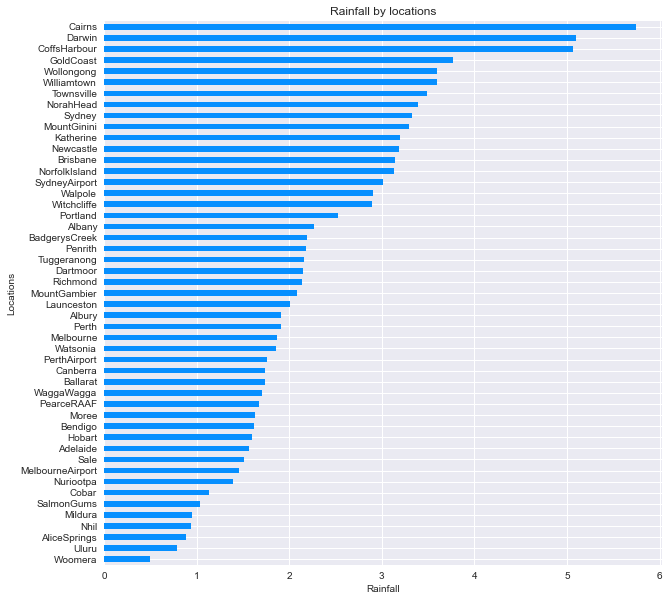

In [20]:
plt.figure(figsize=(10, 10))

location_rain = df.groupby('Location')['Rainfall'].mean()\
                                                 .sort_values()\
                                                 .plot(kind='barh', color= '#068FFF')

plt.title('Rainfall by locations')
plt.xlabel('Rainfall', fontsize=10)
plt.ylabel('Locations', fontsize=10)
plt.show()

**Multivariate Analysis**

*Location vs Pressure*

In [21]:
loca_Pressure = df.groupby('Location')['Pressure9am', 'Pressure3pm'].mean()
loca_Pressure = loca_Pressure.reset_index()
loca_Pressure.head(20)

C:\Users\kongj\AppData\Local\Temp\ipykernel_7492\1051782010.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  loca_Pressure = df.groupby('Location')['Pressure9am', 'Pressure3pm'].mean()


,Location,Pressure9am,Pressure3pm
0,Adelaide,1018.764082,1016.803264
1,Albany,1018.275721,1016.497280
2,Albury,1018.369621,1015.760752
3,AliceSprings,1016.684732,1012.871913
4,BadgerysCreek,1018.461598,1015.635120
5,Ballarat,1017.845093,1016.271201
6,Bendigo,1018.026281,1015.873135
7,Brisbane,1018.232989,1015.099278
8,Cairns,1014.151333,1011.099441
9,Canberra,1018.986480,1016.236299


At 9 a.m., Canberra pressure recorded the highest pressure of 1018 hpa.

At 3 p.m., Adelaide recorded the highest pressure of around 1016.9 hpa.

Dawin pressure, on the other hand, recorded the lowest pressure of 1012 hpa and approximately 1008.4 hpa for pressure at 9am and pressure at 3pm, respectively.

Overall, pressure was higher at 9 a.m. than at 3 p.m.


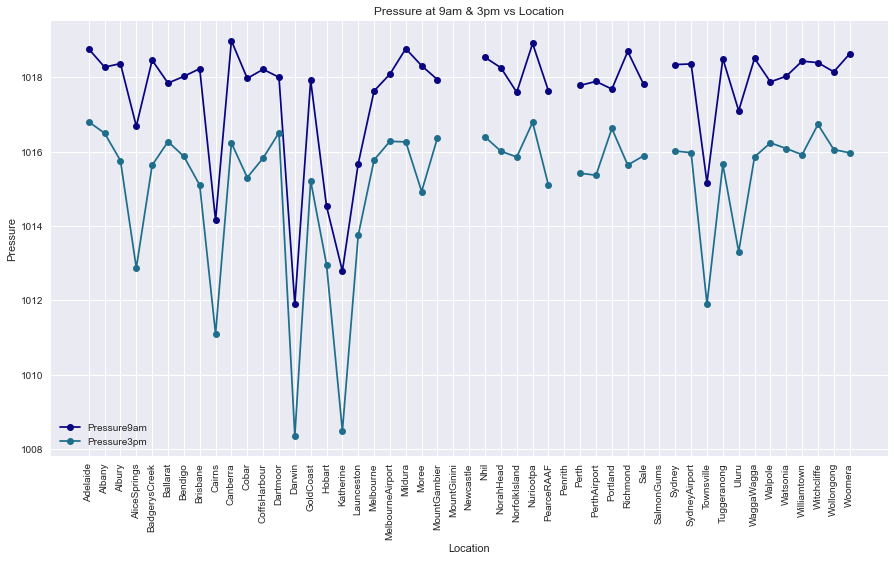

In [22]:
x = loca_Pressure.loc[:, 'Location']
y1 = loca_Pressure['Pressure9am']
y2 = loca_Pressure['Pressure3pm']

plt.figure(figsize=(15,8))

plt.plot(x, y1, marker= 'o' , color='#090580', label='Pressure9am')
plt.plot(x, y2, marker= 'o', color='#1F6E8C', label='Pressure3pm')

plt.xticks(rotation=90)
plt.xlabel('Location')
plt.ylabel('Pressure')
plt.title('Pressure at 9am & 3pm vs Location')

plt.legend()
plt.show()

*Location vs Temperature*

In [23]:
location_Temp9am_3pm = df.groupby('Location')['Temp9am', 'Temp3pm'].mean()
location_Temp9am_3pm = location_Temp9am_3pm.reset_index()
location_Temp9am_3pm.head()

C:\Users\kongj\AppData\Local\Temp\ipykernel_7492\1735576381.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  location_Temp9am_3pm = df.groupby('Location')['Temp9am', 'Temp3pm'].mean()


,Location,Temp9am,Temp3pm
0,Adelaide,16.929046,21.557447
1,Albany,16.236455,18.411555
2,Albury,14.361135,21.373780
3,AliceSprings,21.335658,28.010764
4,BadgerysCreek,16.571698,22.522698


In [24]:
loca_Temp = df.groupby('Location')['MinTemp', 'MaxTemp'].mean()
loca_Temp = loca_Temp.reset_index()
loca_Temp.head()

C:\Users\kongj\AppData\Local\Temp\ipykernel_7492\2832816237.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  loca_Temp = df.groupby('Location')['MinTemp', 'MaxTemp'].mean()


,Location,MinTemp,MaxTemp
0,Adelaide,12.579505,22.898934
1,Albany,12.948438,20.070998
2,Albury,9.530604,22.640872
3,AliceSprings,13.142284,29.248420
4,BadgerysCreek,11.131719,24.031208


In contrast to Dawin, who recorded the lowest pressure at both 9 a.m. and 3 p.m.

Dawin had the highest temperatures of 27 and 33 at 9 a.m. and 3 p.m., respectively.

MountGimini had the lowest temperature at both 9 a.m. and 3 p.m.

The overall temperature at 3pm is higher than the temperature at 9am.

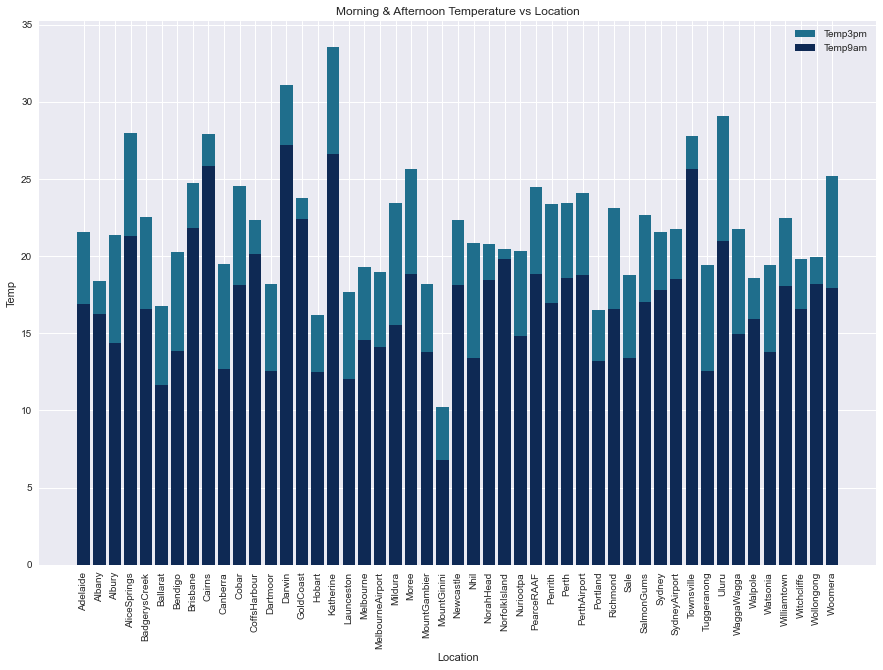

In [25]:
x = location_Temp9am_3pm.loc[:, 'Location']
y1 = location_Temp9am_3pm['Temp9am']
y2 = location_Temp9am_3pm['Temp3pm']

plt.figure(figsize=(15, 10))

plt.bar(x, y2, color='#1F6E8C', label='Temp3pm')
plt.bar(x, y1, color='#0E2954', label='Temp9am')

plt.xticks(rotation=90)
plt.xlabel('Location')
plt.ylabel('Temp')
plt.title('Morning & Afternoon Temperature vs Location')

plt.legend()
plt.show()

Katherine temperature had the highest MinTemp of 23, while Dawin temperature had the highest MaxTemp of 35.

MountGimini temperature, like Temp9am and Temp3pm, recorded the lowest MaxTemp and MinTemp.


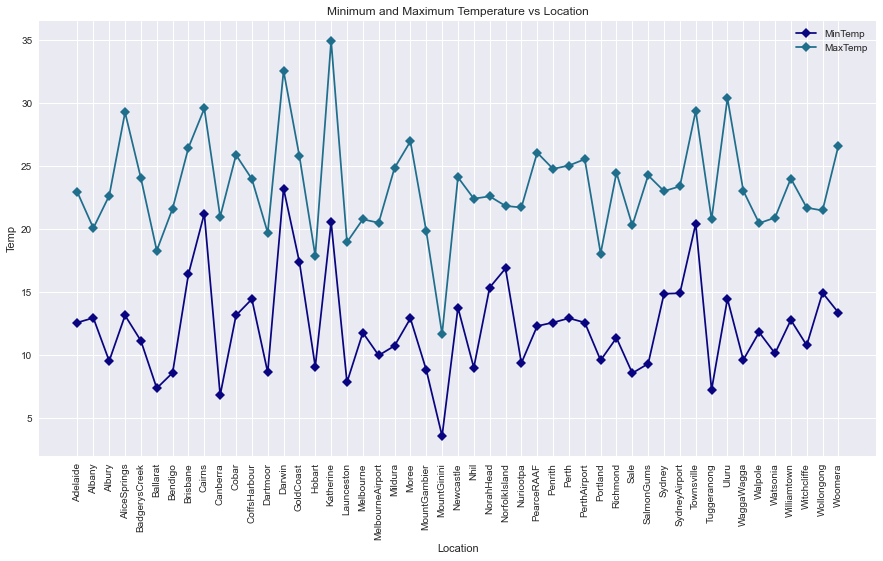

In [26]:
x = loca_Temp.loc[:, 'Location']
y1 = loca_Temp['MinTemp']
y2 = loca_Temp['MaxTemp']

plt.figure(figsize=(15,8))

plt.plot(x, y1, marker= 'D' , color='#090580', label='MinTemp')
plt.plot(x, y2, marker= 'D', color='#1F6E8C', label='MaxTemp')

plt.xticks(rotation=90)
plt.xlabel('Location')
plt.ylabel('Temp')
plt.title('Minimum and Maximum Temperature vs Location')

plt.legend()
plt.show()

*Location vs Humidity*

In [27]:
location_humidity = df.groupby('Location')['Humidity9am', 'Humidity3pm'].mean()
location_humidity = location_humidity.reset_index()
location_humidity.head()

C:\Users\kongj\AppData\Local\Temp\ipykernel_7492\1091171945.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  location_humidity = df.groupby('Location')['Humidity9am', 'Humidity3pm'].mean()


,Location,Humidity9am,Humidity3pm
0,Adelaide,59.701066,44.828105
1,Albany,74.805416,67.407917
2,Albury,74.070604,47.869393
3,AliceSprings,39.690155,24.131466
4,BadgerysCreek,76.895770,51.381855


[link text](https://)Dartmoot's humidity at 9 a.m. recorded the highest humudity of 85.

Mount Gimini and Norfolk Island, on the other hand, have the highest 3pm humidity of 67.


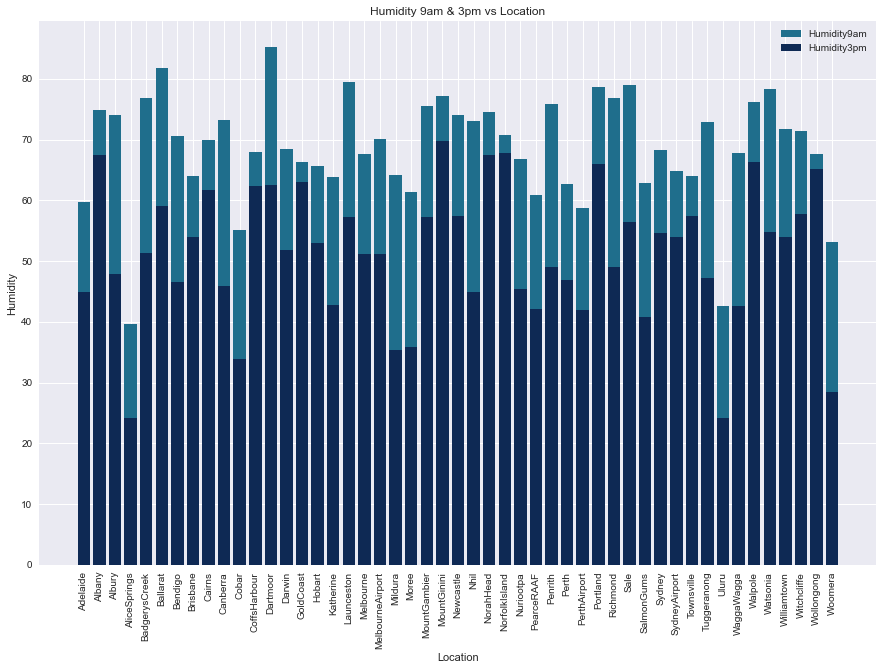

In [28]:
x = location_humidity.loc[:, 'Location']
y1 = location_humidity['Humidity9am']
y2 = location_humidity['Humidity3pm']

plt.figure(figsize=(15, 10))

plt.bar(x, y1, color='#1F6E8C', label='Humidity9am')
plt.bar(x, y2, color='#0E2954', label='Humidity3pm')

plt.xticks(rotation=90)
plt.xlabel('Location')
plt.ylabel('Humidity')
plt.title('Humidity 9am & 3pm vs Location')

plt.legend()
plt.show()

*Location vs Windspeed*

In [29]:
location_windspeed = df.groupby('Location')['WindSpeed3pm', 'WindSpeed9am'].mean()
location_windspeed = location_windspeed.reset_index()
location_windspeed.head()

C:\Users\kongj\AppData\Local\Temp\ipykernel_7492\2666214846.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  location_windspeed = df.groupby('Location')['WindSpeed3pm', 'WindSpeed9am'].mean()


,Location,WindSpeed3pm,WindSpeed9am
0,Adelaide,15.471455,9.950125
1,Albany,18.993498,12.503189
2,Albury,14.382965,8.211151
3,AliceSprings,18.101053,14.727452
4,BadgerysCreek,14.005404,8.051351


At 9 a.m., MelbourneAirport and NewCastle had the highest and lowest WindSpeeds, respectively.

The Gold Coast had the highest WindSpeed at 3pm, while Brisbane had the lowest WindSpeed at 3pm.

WindSpeed at 3pm is greater than WindSpeed at 9am.


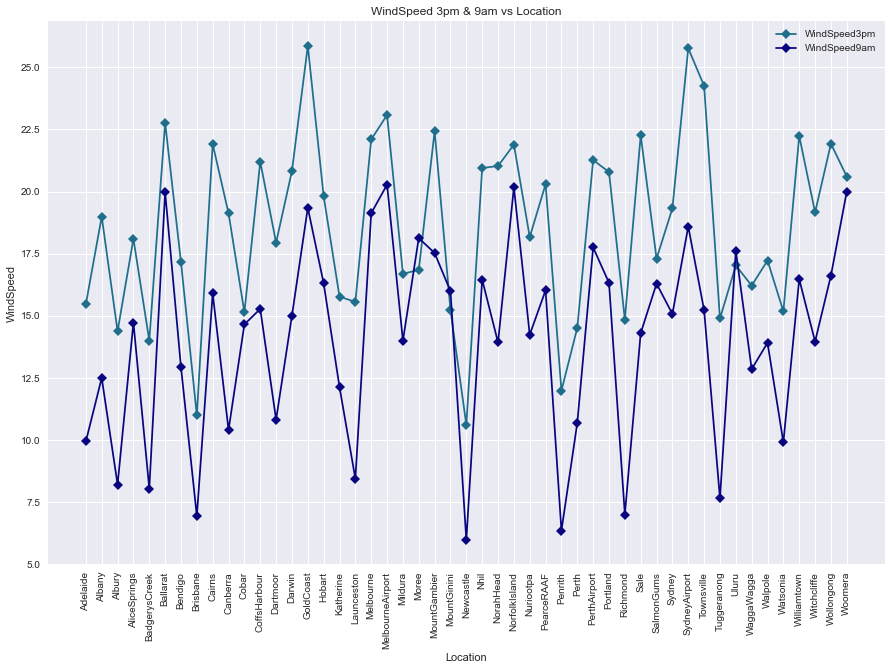

In [30]:
x = location_windspeed.loc[:, 'Location']
y1 = location_windspeed['WindSpeed9am']
y2 =location_windspeed['WindSpeed3pm']

plt.figure(figsize=(15, 10))

plt.plot(x, y2, marker= 'D', color='#1F6E8C', label= 'WindSpeed3pm')
plt.plot(x, y1, marker= 'D', color='#090580', label='WindSpeed9am')

plt.xticks(rotation=90)
plt.xlabel('Location')
plt.ylabel('WindSpeed')
plt.title('WindSpeed 3pm & 9am vs Location')

plt.legend()
plt.show()

*Windspeed relationship*

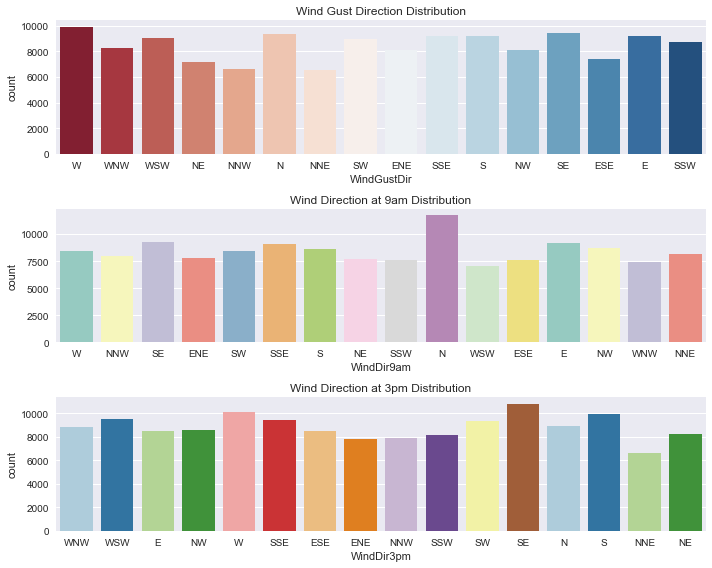

In [31]:
fig, ax = plt.subplots(3, 1, figsize=(10, 8))

sns.countplot(data=df, x='WindGustDir', palette='RdBu', ax=ax[0])
ax[0].set_title('Wind Gust Direction Distribution')

sns.countplot(data=df, x='WindDir9am', palette='Set3', ax=ax[1])
ax[1].set_title('Wind Direction at 9am Distribution')

sns.countplot(data=df, x='WindDir3pm', palette='Paired', ax=ax[2])
ax[2].set_title('Wind Direction at 3pm Distribution')

plt.tight_layout()
plt.show()

If WindGustDir, WindDir9am, and WindDir3pm are less than 3000, there is a good chance it will rain tomorrow.

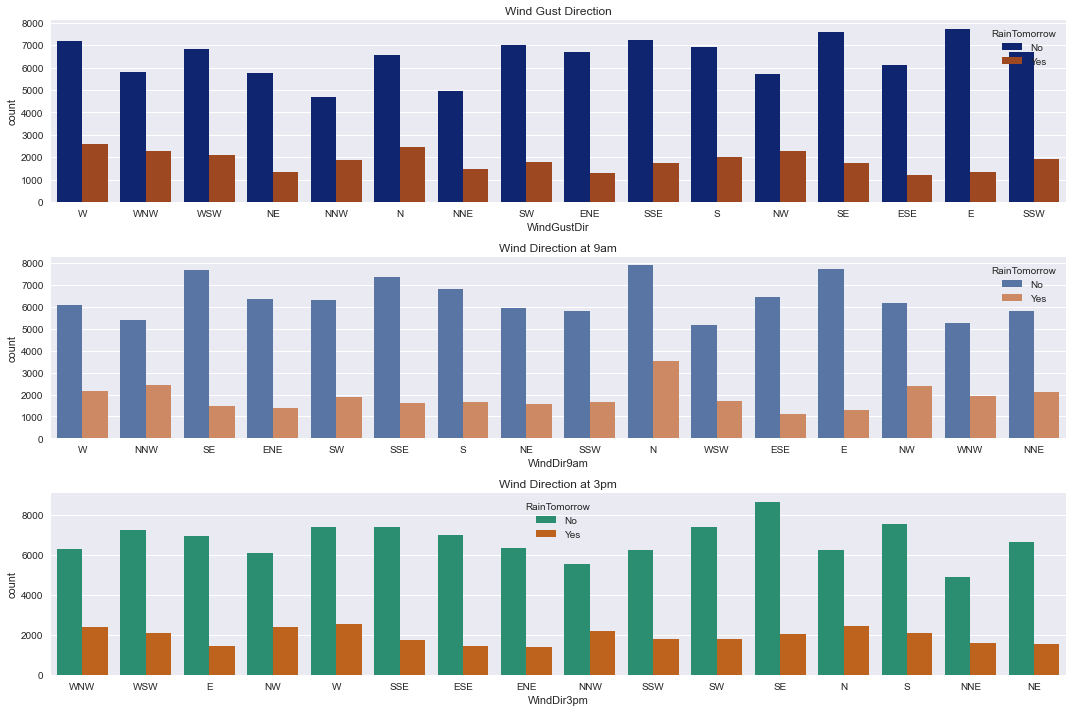

In [32]:
fig, ax = plt.subplots(3, 1, figsize=(15, 10))

sns.countplot(x='WindGustDir', hue='RainTomorrow', data=df, palette='dark', ax=ax[0])
ax[0].set_title('Wind Gust Direction')

sns.countplot(x='WindDir9am', hue='RainTomorrow', data=df, palette='deep', ax=ax[1])
ax[1].set_title('Wind Direction at 9am')

sns.countplot(x='WindDir3pm', hue='RainTomorrow', data=df, palette='Dark2', ax=ax[2])
ax[2].set_title('Wind Direction at 3pm')

plt.tight_layout()
plt.show()

**Does Temperature affect the rate of rainfall?**



High rainfall occurs when MaxTemp is between 10 and 35 and MinTemp between 10 and 25

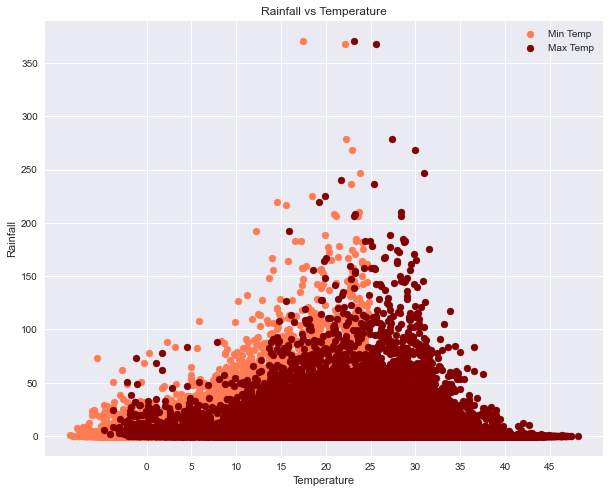

In [33]:
plt.figure(figsize=(10, 8))

plt.scatter(df['MinTemp'], df['Rainfall'], color='#FF7B54', label='Min Temp')
plt.scatter(df['MaxTemp'], df['Rainfall'], color='#820000', label='Max Temp')

plt.xlabel('Temperature')
plt.ylabel('Rainfall')
plt.title('Rainfall vs Temperature')
plt.xticks(range(0, 50, 5))

plt.legend()
plt.grid(True)

plt.show()

**Impact of MaxTemp and MinTemp on RainTomorrow?**

When MaxTemp is low, the probability that it will not rain the next day is high.

When MinTemp is high, the probability of rain the next day is high.


<AxesSubplot:xlabel='Day', ylabel='MinTemp'>

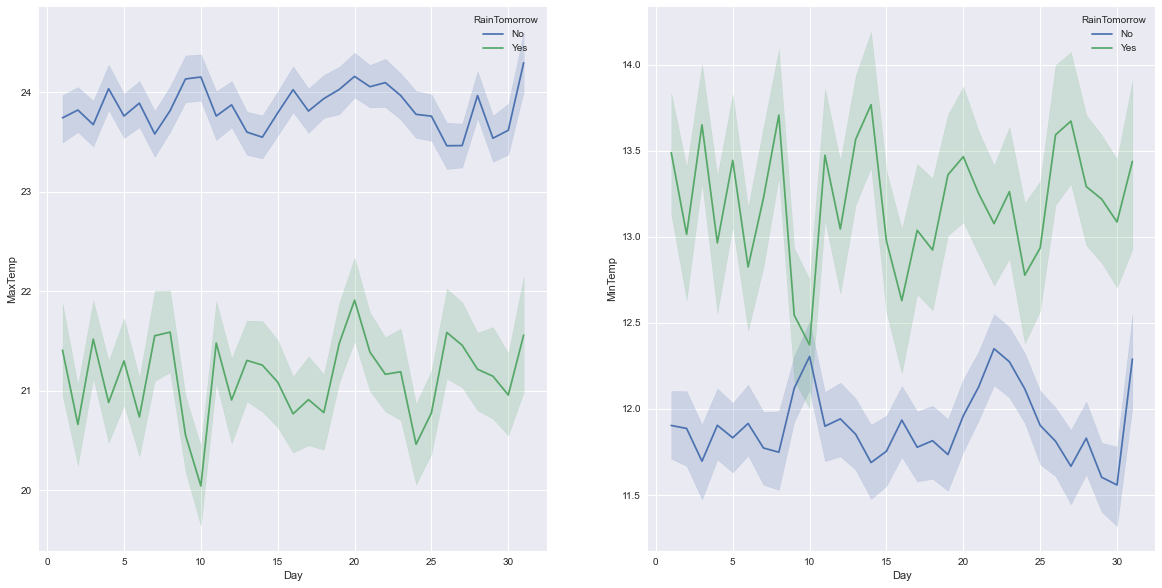

In [34]:
fig, ax = plt.subplots(1,2, figsize=(20,10))

sns.lineplot(x= df['Day'], y=df['MaxTemp'], hue=df['RainTomorrow'], ax=ax[0])

sns.lineplot(x= df['Day'], y=df['MinTemp'], hue=df['RainTomorrow'], ax=ax[1])

**Impact of Temp9am and Temp3pm on RainTomorrow?**

The likelihood of rain tomorrow is high if the temperature at 9 a.m. falls below 17.

If Temp3pm is below 22, the likelihood of rain the next day is high.


<AxesSubplot:xlabel='Day', ylabel='Temp3pm'>

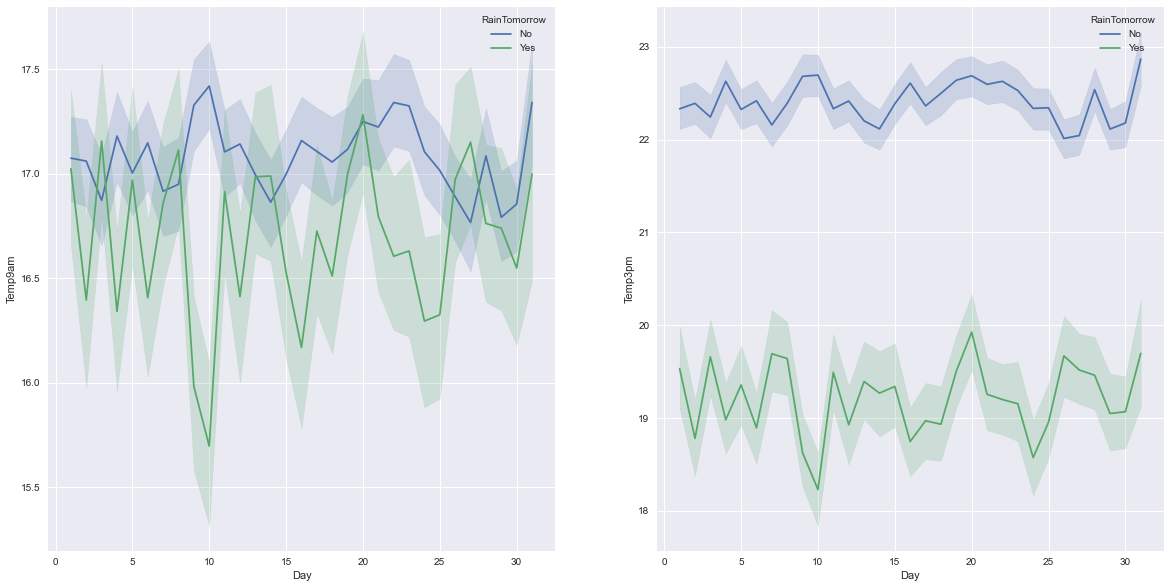

In [35]:
fig, ax = plt.subplots(1,2, figsize=(20,10))

sns.lineplot(x= df['Day'], y=df['Temp9am'], hue=df['RainTomorrow'], ax=ax[0])

sns.lineplot(x= df['Day'], y=df['Temp3pm'], hue=df['RainTomorrow'], ax=ax[1])

**Correlation Analysis**

<AxesSubplot:>

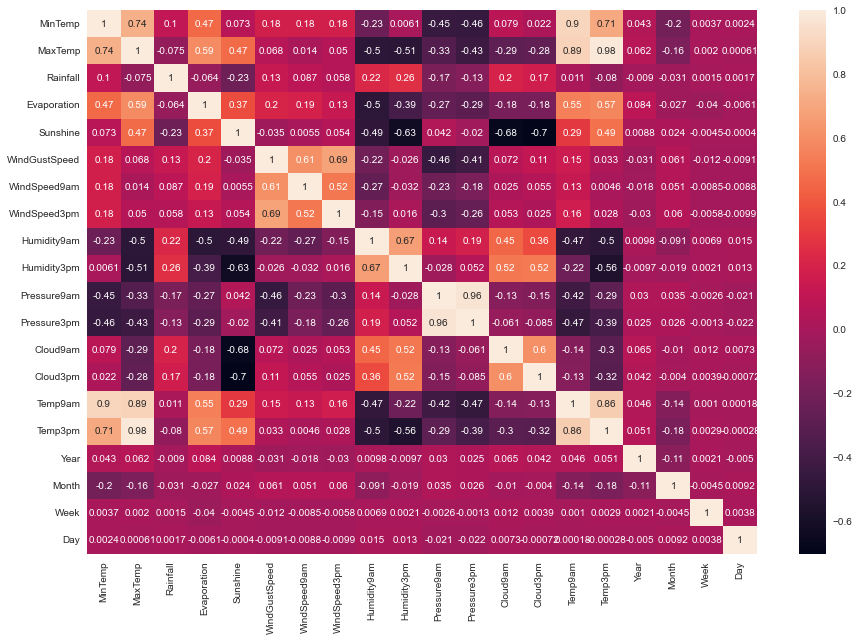

In [36]:
plt.figure(figsize=(15,10))

sns.heatmap(df.corr(), annot=True, linecolor='white')

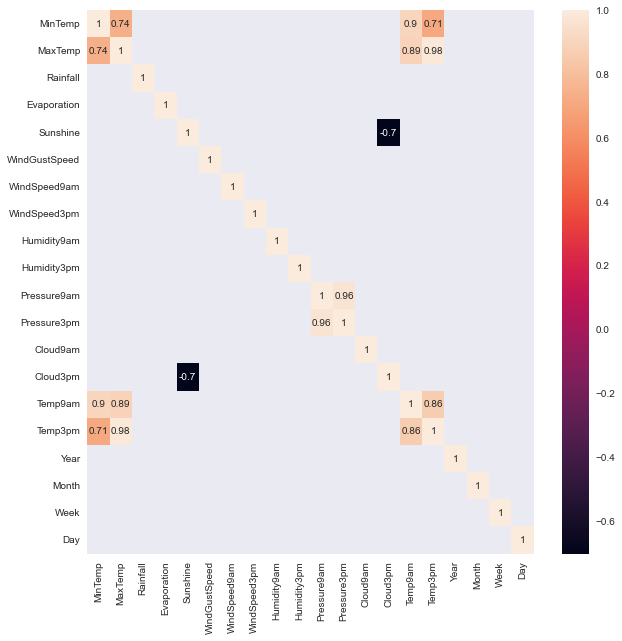

In [37]:
# Drill down on high correlation
correlation_threshold = 0.7
correlation_matrix = df.corr()
mask = np.abs(correlation_matrix) >= correlation_threshold

plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix[mask], annot=True, linecolor='white')
plt.show()

### **Data Preprocessing**

In [38]:
# Dropping columns with too many null values, inserting values inside will generate inconsistent result
columns_to_drop = ['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm']
df = df.drop(columns=columns_to_drop)

In [39]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
Year                 0
Month                0
Week                 0
Day                  0
dtype: int64

In [40]:
df.shape

(145460, 23)

**Outlier**

In [41]:
outlier_features = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Temp9am', 'Temp3pm']

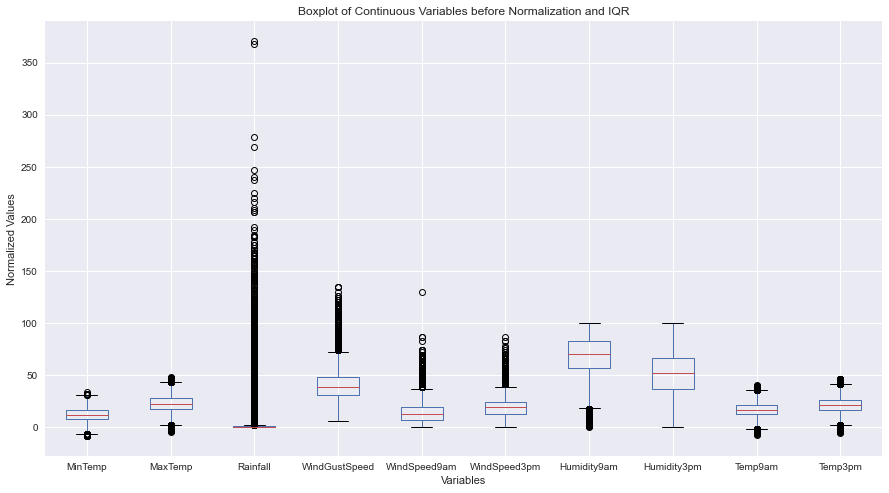

In [42]:
df.boxplot(column=outlier_features, figsize=(15, 8))
plt.title("Boxplot of Continuous Variables before Normalization and IQR")
plt.xlabel("Variables")
plt.ylabel("Normalized Values")
plt.show()

In [43]:
# Remove outliers using IQR approach
Q1 = df[outlier_features].quantile(0.25)
Q3 = df[outlier_features].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify rows where any continuous variable falls within the bounds
within_bounds = ~((df[outlier_features] < lower_bound) | (df[outlier_features] > upper_bound)).any(axis=1)

# Transform the original DataFrame by filtering out rows outside the bounds
df = df[within_bounds]

# Calculate the number of removed rows
num_removed_rows = len(within_bounds) - within_bounds.sum()
print(f"Number of removed rows: {num_removed_rows}")

Number of removed rows: 31262


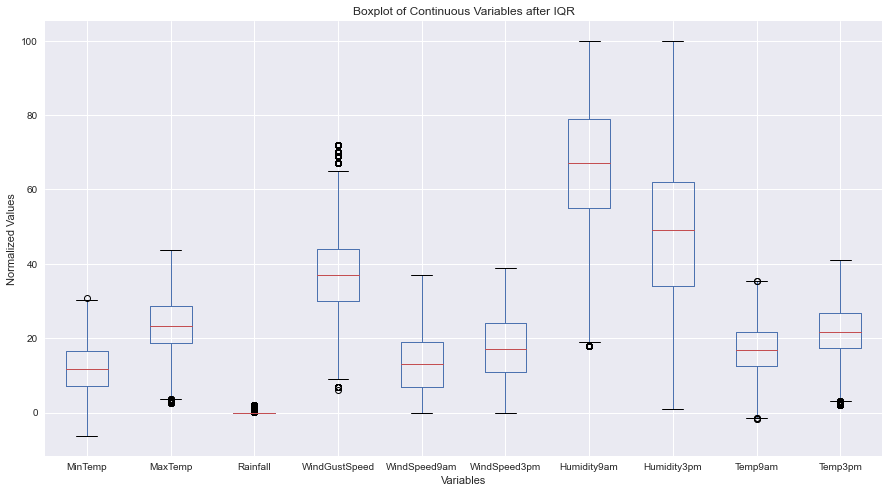

In [44]:
df.boxplot(column=outlier_features, figsize=(15, 8))
plt.title("Boxplot of Continuous Variables after IQR")
plt.xlabel("Variables")
plt.ylabel("Normalized Values")
plt.show()

In [45]:
# New dataframe shape
df.shape

(114198, 23)

In [46]:
# New null value count
df.isnull().sum()

Date                 0
Location             0
MinTemp           1316
MaxTemp           1108
Rainfall          3046
WindGustDir       8017
WindGustSpeed     7977
WindDir9am        9076
WindDir3pm        3375
WindSpeed9am      1504
WindSpeed3pm      2460
Humidity9am       2123
Humidity3pm       3569
Pressure9am      11900
Pressure3pm      11861
Temp9am           1447
Temp3pm           2875
RainToday         3046
RainTomorrow      2748
Year                 0
Month                0
Week                 0
Day                  0
dtype: int64

**Handle Variable**

In [47]:
# Create a mapping of months to seasons
month_to_season = {1: 'Summer', 2: 'Summer', 3: 'Autumn', 4: 'Autumn', 5: 'Autumn', 6: 'Winter', 7: 'Winter', 8: 'Winter', 9: 'Spring', 10: 'Spring', 11: 'Spring', 12: 'Summer'}

# Map with dictionary
df['Season'] = df['Month'].map(month_to_season)

In [48]:
numeric_features = ['MinTemp', 'MaxTemp', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']
categorical_features = ['WindGustDir', 'WindDir9am', 'WindDir3pm']

# Group data by season and location
grouped_data = df.groupby(['Location', 'Season', 'Month'], group_keys=False)

# Fill NaN values with pairwise mean for numeric features
df[numeric_features] = grouped_data[numeric_features].apply(lambda x: x.fillna(x.mean()))

# Fill NaN values with pairwise mode for categorical features
df[categorical_features] = grouped_data[categorical_features].apply(lambda x: x.fillna(x.mode().iloc[0]))

# Fill remaining NaN values with forward fill (ffill) and backward fill (bfill)
df[numeric_features] = grouped_data[numeric_features].ffill().bfill()
df[categorical_features] = grouped_data[categorical_features].ffill().bfill()

In [49]:
df.drop('Season', axis=1, inplace=True)

In [50]:
# Replace rainfall Nan Values with 0 (Assume there is 0 rainfall with nan attributes)
df['Rainfall'] = df['Rainfall'].fillna(0)

In [51]:
# Omit rows with nan values for both classification column
df.dropna(subset=['RainToday', 'RainTomorrow'], inplace=True)

In [52]:
Direction_wind = {'N': 0, 'NNE': 22.5, 'NE': 45.0, 'ENE': 67.5, 'E': 90.0, 'ESE': 112.5, 'SE': 135.0,
                    'SSE': 157.5, 'S': 180.0, 'SSW': 202.5, 'SW': 225.0, 'WSW': 247.5, 'W': 270.0,
                    'WNW': 292.5, 'NW': 315.0, 'NNW': 337.5}

df['WindGustDir'] = df['WindGustDir'].replace(Direction_wind)
df['WindDir9am'] = df['WindDir9am'].replace(Direction_wind)
df['WindDir3pm'] = df['WindDir3pm'].replace(Direction_wind)

In [53]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Year             0
Month            0
Week             0
Day              0
dtype: int64

**Label Encoding**

In [54]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['RainToday'] = label_encoder.fit_transform(df['RainToday'])
df['RainTomorrow'] = label_encoder.fit_transform(df['RainTomorrow'])
df['Location'] = label_encoder.fit_transform(df['Location'])

**Balancing Imbalance Data**

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

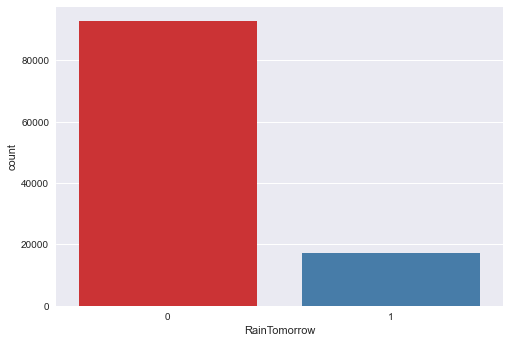

In [55]:
sns.countplot(x='RainTomorrow', data = df, palette = "Set1")

<AxesSubplot:xlabel='RainToday', ylabel='count'>

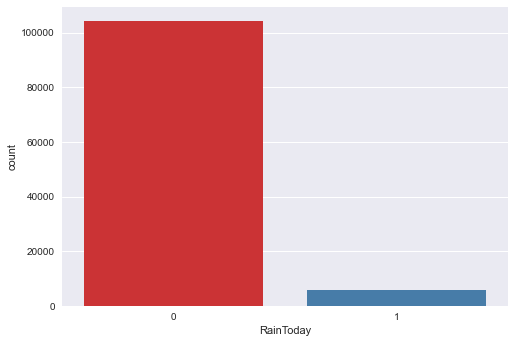

In [56]:
sns.countplot(x='RainToday', data = df, palette = "Set1")

In [57]:
from sklearn.utils import resample

# Split data for both columns RainToday and RainTomorrow
no_tomorrow = df[df['RainTomorrow'] == 0]
yes_tomorrow = df[df['RainTomorrow'] == 1]

no_today = df[df['RainToday'] == 0]
yes_today = df[df['RainToday'] == 1]

# Oversample minority class for both columns
yes_tomorrow_oversampled = resample(yes_tomorrow, replace=True, n_samples=len(no_tomorrow), random_state=123)
yes_today_oversampled = resample(yes_today, replace=True, n_samples=len(no_today), random_state=123)

# Concatenate oversampled data with majority class
oversampled_data_tomorrow = pd.concat([no_tomorrow, yes_tomorrow_oversampled])
oversampled_data_today = pd.concat([no_today, yes_today_oversampled])

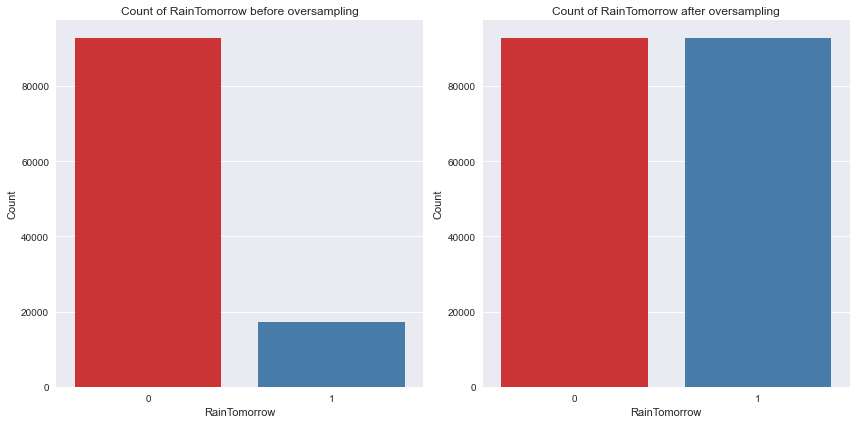

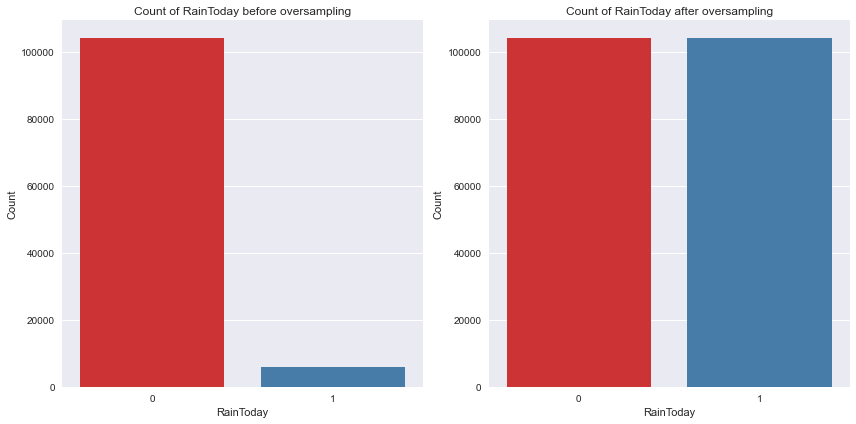

In [58]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# RainTomorrow before oversampling
sns.countplot(x='RainTomorrow', data=df, palette="Set1", ax=axes[0])
axes[0].set_title("Count of RainTomorrow before oversampling")
axes[0].set_xlabel("RainTomorrow")
axes[0].set_ylabel("Count")

# RainTomorrow after oversampling
sns.countplot(x='RainTomorrow', data=oversampled_data_tomorrow, palette="Set1", ax=axes[1])
axes[1].set_title("Count of RainTomorrow after oversampling")
axes[1].set_xlabel("RainTomorrow")
axes[1].set_ylabel("Count")
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# RainToday before oversampling
sns.countplot(x='RainToday', data=df, palette="Set1", ax=axes[0])
axes[0].set_title("Count of RainToday before oversampling")
axes[0].set_xlabel("RainToday")
axes[0].set_ylabel("Count")

# RainToday after oversampling
sns.countplot(x='RainToday', data=oversampled_data_today, palette="Set1", ax=axes[1])
axes[1].set_title("Count of RainToday after oversampling")
axes[1].set_xlabel("RainToday")
axes[1].set_ylabel("Count")
plt.tight_layout()
plt.show()


**Scaling**

In [59]:
df_numerical=df.select_dtypes(include=['int64','float64'])

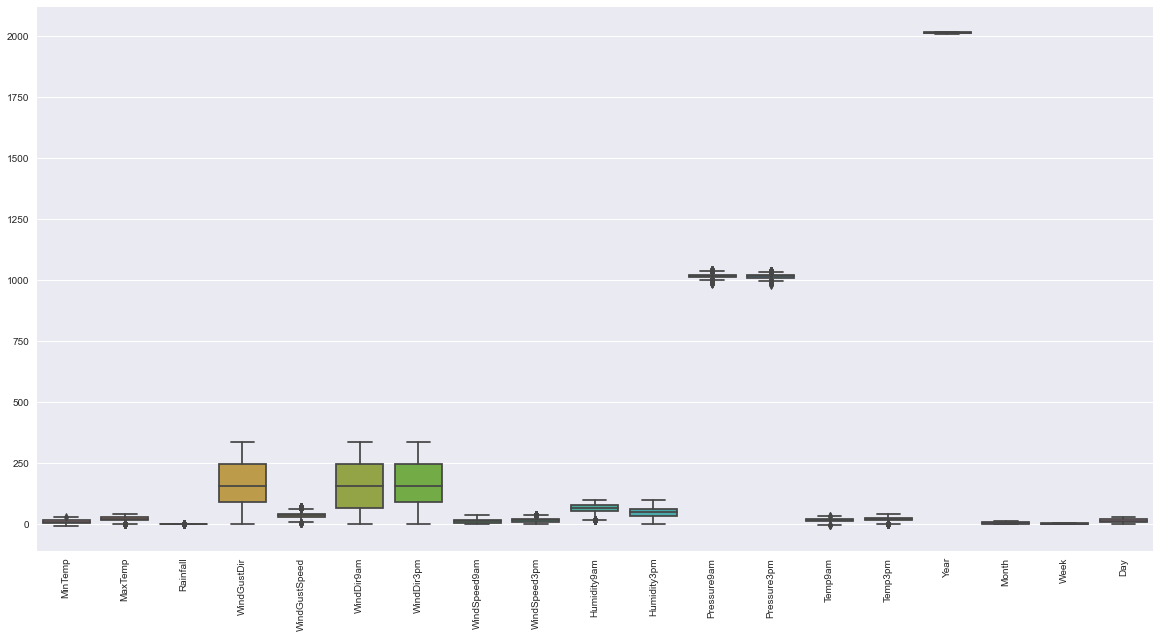

In [61]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df_numerical)
plt.xticks(rotation=90)
plt.show()

In [62]:
from sklearn.preprocessing import StandardScaler
sd=StandardScaler()
df_numerical_scaled=sd.fit_transform(df_numerical)

In [63]:
cleaned_df=pd.DataFrame(df_numerical_scaled,columns=df_numerical.columns)

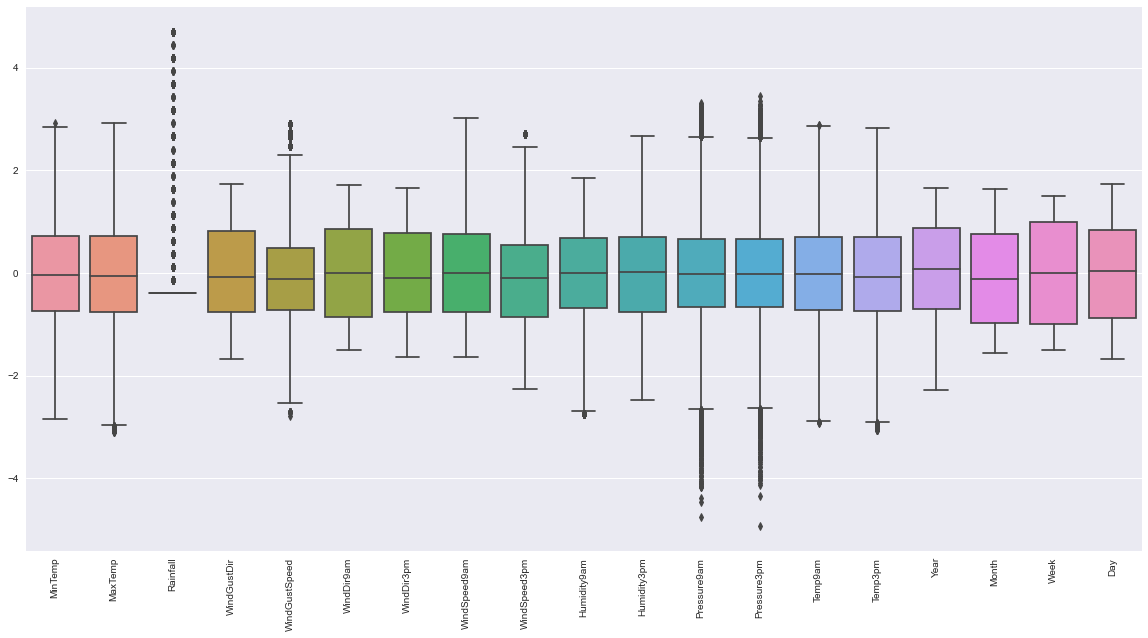

In [64]:
plt.figure(figsize=(20,10))
sns.boxplot(data= cleaned_df)
plt.xticks(rotation=90)
plt.show()

### **Feature Selection**

In [65]:
pip install boruta

Note: you may need to restart the kernel to use updated packages.


In [66]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from boruta import BorutaPy
from sklearn.preprocessing import MinMaxScaler

features = df.drop(['Rainfall', 'Date', 'Month', 'Year', 'Day', 'Week', 'Location', 'RainTomorrow'], axis=1)
target = df['Rainfall']

def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order * np.array([ranks]).T).T[0]
    ranks = list(map(lambda x: round(x, 2), ranks))
    return dict(zip(names, ranks))

def boruta_feature_selection(X, y):
    colnames = X.columns

    # Use 80-20 split, random state = 10
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

    rf = RandomForestRegressor(n_jobs=-1, max_depth=5)
    feat_selector = BorutaPy(rf, n_estimators='auto', random_state=1)
    feat_selector.fit(X_train.values, y_train.values.ravel())

    feature_scores = ranking(list(map(float, feat_selector.ranking_)), colnames, order=-1)
    feature_scores = pd.DataFrame(list(feature_scores.items()), columns=['Features', 'Score'])
    feature_scores = feature_scores.sort_values('Score', ascending=False)

    return feature_scores

# Perform feature selection using Boruta
feature_scores = boruta_feature_selection(features, target)
print(feature_scores)


         Features  Score
0         MinTemp   1.00
1         MaxTemp   1.00
3   WindGustSpeed   1.00
4      WindDir9am   1.00
5      WindDir3pm   1.00
6    WindSpeed9am   1.00
7    WindSpeed3pm   1.00
8     Humidity9am   1.00
9     Humidity3pm   1.00
10    Pressure9am   1.00
13        Temp3pm   1.00
14      RainToday   1.00
11    Pressure3pm   0.67
2     WindGustDir   0.33
12        Temp9am   0.00


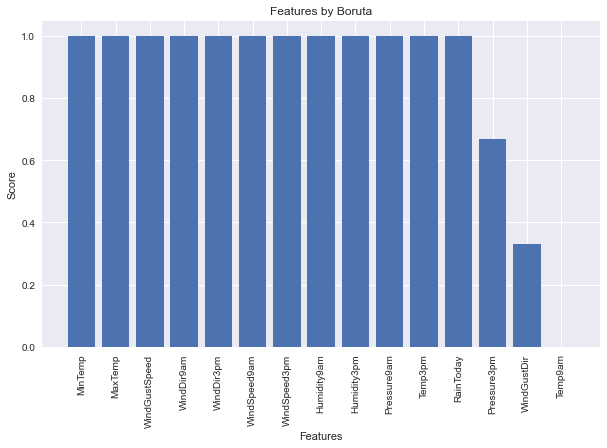

In [67]:
plt.figure(figsize=(10, 6))
plt.bar(feature_scores['Features'], feature_scores['Score'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Score')
plt.title('Features by Boruta')
plt.show()

In [68]:
top_12_features = feature_scores.head(12)
print(top_12_features)

         Features  Score
0         MinTemp    1.0
1         MaxTemp    1.0
3   WindGustSpeed    1.0
4      WindDir9am    1.0
5      WindDir3pm    1.0
6    WindSpeed9am    1.0
7    WindSpeed3pm    1.0
8     Humidity9am    1.0
9     Humidity3pm    1.0
10    Pressure9am    1.0
13        Temp3pm    1.0
14      RainToday    1.0


In [69]:
top_13_features = feature_scores.head(13)
print(top_13_features)

         Features  Score
0         MinTemp   1.00
1         MaxTemp   1.00
3   WindGustSpeed   1.00
4      WindDir9am   1.00
5      WindDir3pm   1.00
6    WindSpeed9am   1.00
7    WindSpeed3pm   1.00
8     Humidity9am   1.00
9     Humidity3pm   1.00
10    Pressure9am   1.00
13        Temp3pm   1.00
14      RainToday   1.00
11    Pressure3pm   0.67


### **Model Building**

In [70]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import GRU
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
from keras.layers import Activation

# metrics for model evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn import metrics

# Hyperparameter Tuning (Grid Search)
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

In [71]:
# Using top 10 features from boruta selection
selected_features = top_12_features['Features'].tolist()
#selected_features = top_13_features['Features'].tolist()
X_selected = df[selected_features]
y = df["Rainfall"]

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, shuffle=False)

In [73]:
# Define a learning rate scheduler function
def lr_scheduler(epoch, lr):
    # Reduces the learning rate by a factor of 0.1 every 5 epochs to fine-tune the learning rate during training.
    if epoch % 5 == 0 and epoch != 0:
        lr *= 0.1
    return lr

Gated Recurrent Unit (GRU)

In [74]:
# Define the GRU model with learning rate scheduling
GRU_model = Sequential()
GRU_model.add(GRU(units=64, return_sequences=True, activation='tanh', input_shape=(X_train.shape[1], 1)))
GRU_model.add(GRU(units=64, return_sequences=True, activation='tanh'))
GRU_model.add(GRU(units=64, return_sequences=True, activation='tanh'))
GRU_model.add(GRU(units=64, activation='tanh'))
GRU_model.add(Dense(units=1))

# Compile the model with custom optimizer using learning rate scheduler
optimizer = Adam(learning_rate=0.001)
GRU_model.compile(optimizer=optimizer, loss='mse')

# Define the learning rate scheduler callback
lr_scheduler_callback = LearningRateScheduler(lr_scheduler)

# Train the model with learning rate scheduler callback
GRU_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), callbacks=[lr_scheduler_callback])

# Make predictions using the trained GRU model
y_pred = GRU_model.predict(X_test)

# Convert to numpy arrays and flatten
y_pred = y_pred.ravel()
y_test = y_test.ravel()

# Calculate mean squared error (MSE)
gru_mse = mean_squared_error(y_test, y_pred)

# Calculate mean absolute error (MAE)
gru_mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared (R^2)
gru_r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", gru_mse)
print("Mean Absolute Error (MAE):", gru_mae)
print("R-squared (R^2):", gru_r2)


Epoch 1/10
2754/2754 [==============================] - 69s 20ms/step - loss: 0.0532 - val_loss: 0.0343 - lr: 0.0010
Epoch 2/10
2754/2754 [==============================] - 61s 22ms/step - loss: 0.0406 - val_loss: 0.0328 - lr: 0.0010
Epoch 3/10
2754/2754 [==============================] - 55s 20ms/step - loss: 0.0399 - val_loss: 0.0334 - lr: 0.0010
Epoch 4/10
2754/2754 [==============================] - 54s 20ms/step - loss: 0.0393 - val_loss: 0.0323 - lr: 0.0010
Epoch 5/10
2754/2754 [==============================] - 56s 20ms/step - loss: 0.0392 - val_loss: 0.0321 - lr: 0.0010
Epoch 6/10
2754/2754 [==============================] - 55s 20ms/step - loss: 0.0383 - val_loss: 0.0318 - lr: 1.0000e-04
Epoch 7/10
2754/2754 [==============================] - 55s 20ms/step - loss: 0.0382 - val_loss: 0.0319 - lr: 1.0000e-04
Epoch 8/10
2754/2754 [==============================] - 58s 21ms/step - loss: 0.0382 - val_loss: 0.0319 - lr: 1.0000e-04
Epoch 9/10
2754/2754 [==============================

Artificial Neural Network (ANN)

In [75]:
# Define the ANN model with learning rate scheduling
ANN_model = Sequential()
ANN_model.add(Dense(units=64, input_shape=(X_train.shape[1],), activation='relu'))
ANN_model.add(Dense(units=64, activation='relu'))
ANN_model.add(Dense(units=64, activation='relu'))
ANN_model.add(Dense(units=64, activation='relu'))
ANN_model.add(Dense(units=1))

# Compile the model with Adam optimizer and learning rate scheduler
optimizer = Adam(learning_rate=0.001)
ANN_model.compile(optimizer=optimizer, loss='mse')

# Define the learning rate scheduler callback
lr_scheduler_callback = LearningRateScheduler(lr_scheduler)

# Train the model with learning rate scheduler callback
ANN_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), callbacks=[lr_scheduler_callback])

# Make predictions using the trained ANN model
y_pred = ANN_model.predict(X_test)

# Convert to numpy arrays and flatten
y_pred = y_pred.ravel()
y_test = y_test.ravel()

# Calculate mean squared error (MSE)
ann_mse = mean_squared_error(y_test, y_pred)

# Calculate mean absolute error (MAE)
ann_mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared (R^2)
ann_r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", ann_mse)
print("Mean Absolute Error (MAE):", ann_mae)
print("R-squared (R^2):", ann_r2)

Epoch 1/10
2754/2754 [==============================] - 5s 1ms/step - loss: 1.3874 - val_loss: 0.3148 - lr: 0.0010
Epoch 2/10
2754/2754 [==============================] - 4s 2ms/step - loss: 0.1901 - val_loss: 0.0819 - lr: 0.0010
Epoch 3/10
2754/2754 [==============================] - 5s 2ms/step - loss: 0.1058 - val_loss: 0.0557 - lr: 0.0010
Epoch 4/10
2754/2754 [==============================] - 4s 2ms/step - loss: 0.0685 - val_loss: 0.0587 - lr: 0.0010
Epoch 5/10
2754/2754 [==============================] - 4s 1ms/step - loss: 0.0570 - val_loss: 0.0396 - lr: 0.0010
Epoch 6/10
2754/2754 [==============================] - 4s 2ms/step - loss: 0.0417 - val_loss: 0.0382 - lr: 1.0000e-04
Epoch 7/10
2754/2754 [==============================] - 4s 2ms/step - loss: 0.0410 - val_loss: 0.0333 - lr: 1.0000e-04
Epoch 8/10
2754/2754 [==============================] - 4s 1ms/step - loss: 0.0408 - val_loss: 0.0332 - lr: 1.0000e-04
Epoch 9/10
2754/2754 [==============================] - 4s 2ms/step 

Recurrent Neural Network (RNN)

In [76]:
# Initialising the RNN
Rnn = Sequential()

Rnn.add(SimpleRNN(units=64, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], 1)))
Rnn.add(SimpleRNN(units=64, activation='tanh', return_sequences=True))
Rnn.add(SimpleRNN(units=64, activation='tanh', return_sequences=True))
Rnn.add(SimpleRNN(units=64, activation='tanh'))
Rnn.add(Dense(units=1))

# Compiling the RNN with Adam optimizer and learning rate scheduler
optimizer = Adam(learning_rate=0.001)
Rnn.compile(optimizer=optimizer, loss='mean_squared_error')

# Define the learning rate scheduler callback
lr_scheduler_callback = LearningRateScheduler(lr_scheduler)

# Fitting the RNN to the Training set with learning rate scheduler callback
Rnn.fit(X_train, y_train, epochs=10, batch_size=32, callbacks=[lr_scheduler_callback])

y_pred = Rnn.predict(np.expand_dims(X_test, axis=2))

# Calculate MSE
rnn_mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE): ", rnn_mse)

# Calculate MAE
rnn_mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE): ", rnn_mae)

# Calculate R-squared
rnn_r2 = r2_score(y_test, y_pred)
print("R-squared: ", rnn_r2)

Epoch 1/10
2754/2754 [==============================] - 25s 8ms/step - loss: 0.0491 - lr: 0.0010
Epoch 2/10
2754/2754 [==============================] - 22s 8ms/step - loss: 0.0406 - lr: 0.0010
Epoch 3/10
2754/2754 [==============================] - 22s 8ms/step - loss: 0.0404 - lr: 0.0010
Epoch 4/10
2754/2754 [==============================] - 22s 8ms/step - loss: 0.0451 - lr: 0.0010
Epoch 5/10
2754/2754 [==============================] - 22s 8ms/step - loss: 0.0403 - lr: 0.0010
Epoch 6/10
2754/2754 [==============================] - 22s 8ms/step - loss: 0.0385 - lr: 1.0000e-04
Epoch 7/10
2754/2754 [==============================] - 22s 8ms/step - loss: 0.0383 - lr: 1.0000e-04
Epoch 8/10
2754/2754 [==============================] - 23s 9ms/step - loss: 0.0382 - lr: 1.0000e-04
Epoch 9/10
2754/2754 [==============================] - 24s 9ms/step - loss: 0.0381 - lr: 1.0000e-04
Epoch 10/10
689/689 [==============================] - 3s 3ms/step
Mean Squared Error (MSE):  0.032018132805636

### **Hyperparameter Tuning**

In [77]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from keras.optimizers import SGD
from tensorflow.keras.layers import Dropout

In [78]:
############################ NEW FOR FASTER RESULT  #################################################
# Define early stopping
early_stopping = EarlyStopping(patience=3, monitor='loss', mode='min')

# Define the parameter grid for randomized search
param_grid = {
    'units': sp_randint(64, 128),
    'num_hidden_layers': sp_randint(4, 10),
    'dropout_rate': [0.2, 0.4, 0.6],
    'epochs': sp_randint(10, 40)
}

In [79]:
# Define the GRU model with learning rate scheduling and early stopping
def create_gru_model(units=64, num_hidden_layers=4, activation='tanh', dropout_rate=0.2):
    GRU_model = Sequential()
    GRU_model.add(GRU(units=units, return_sequences=True, activation=activation, input_shape=(X_train.shape[1], 1)))
    GRU_model.add(Dropout(dropout_rate))
    GRU_model.add(GRU(units=units, activation=activation))
    GRU_model.add(Dense(units=1))
    optimizer = Adam()
    GRU_model.compile(optimizer=optimizer, loss='mse')
    return GRU_model

# Create the GRU model
GRU_model = KerasRegressor(build_fn=create_gru_model, verbose=1)

# Perform randomized search
random_search = RandomizedSearchCV(estimator=GRU_model, param_distributions=param_grid, scoring='neg_mean_squared_error', cv=3, n_iter=10, n_jobs=-1)
random_result = random_search.fit(X_train, y_train, callbacks=[early_stopping, LearningRateScheduler(lr_scheduler)])

# Make predictions using the best model
y_pred = random_result.best_estimator_.predict(X_test)

# Convert to numpy arrays and flatten
y_pred = y_pred.ravel()
y_test = y_test.ravel()

# Calculate mean squared error (MSE)
gru_tuned_mse = mean_squared_error(y_test, y_pred)

# Calculate mean absolute error (MAE)
gru_tuned_mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared (R^2)
gru_tuned_r2 = r2_score(y_test, y_pred)

print("Best Parameters:", random_result.best_params_)
print("Mean Squared Error (MSE):", gru_tuned_mse)
print("Mean Absolute Error (MAE):", gru_tuned_mae)
print("R-squared (R^2):", gru_tuned_r2)

C:\Users\kongj\AppData\Local\Temp\ipykernel_7492\1823141045.py:13: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  GRU_model = KerasRegressor(build_fn=create_gru_model, verbose=1)


Epoch 1/29
2754/2754 [==============================] - 53s 18ms/step - loss: 0.0593 - lr: 0.0010
Epoch 2/29
2754/2754 [==============================] - 49s 18ms/step - loss: 0.0421 - lr: 0.0010
Epoch 3/29
2754/2754 [==============================] - 49s 18ms/step - loss: 0.0406 - lr: 0.0010
Epoch 4/29
2754/2754 [==============================] - 50s 18ms/step - loss: 0.0401 - lr: 0.0010
Epoch 5/29
2754/2754 [==============================] - 50s 18ms/step - loss: 0.0397 - lr: 0.0010
Epoch 6/29
2754/2754 [==============================] - 50s 18ms/step - loss: 0.0387 - lr: 1.0000e-04
Epoch 7/29
2754/2754 [==============================] - 50s 18ms/step - loss: 0.0386 - lr: 1.0000e-04
Epoch 8/29
2754/2754 [==============================] - 50s 18ms/step - loss: 0.0386 - lr: 1.0000e-04
Epoch 9/29
2754/2754 [==============================] - 51s 19ms/step - loss: 0.0386 - lr: 1.0000e-04
Epoch 10/29
2754/2754 [==============================] - 49s 18ms/step - loss: 0.0385 - lr: 1.0000e-04

In [84]:
from sklearn.base import BaseEstimator
from sklearn.utils import _joblib

class PicklableKerasRegressor(KerasRegressor, BaseEstimator):
    def __getstate__(self):
        state = self.__dict__.copy()
        del state['_estimator_type']
        return state

    def __setstate__(self, state):
        state['_estimator_type'] = 'regressor'
        self.__dict__.update(state)

    def __reduce__(self):
        return _joblib.dump, (self.__class__, self.__dict__, None)


In [86]:
# Define the ANN model with learning rate scheduling
def create_ann_model(units=64, num_hidden_layers=4, dropout_rate=0.2):
    ANN_model = Sequential()
    ANN_model.add(Dense(units=units, input_shape=(X_train.shape[1],), activation = 'relu'))

    for _ in range(num_hidden_layers):
        ANN_model.add(Dense(units=units, activation = 'relu'))
        ANN_model.add(Dropout(dropout_rate))

    ANN_model.add(Dense(units=1))

    optimizer = Adam()
    ANN_model.compile(optimizer=optimizer, loss='mse')
    return ANN_model

# Create the ANN model
ANN_model = PicklableKerasRegressor(build_fn=create_ann_model, verbose=1)

# Perform randomized search
random_search = RandomizedSearchCV(estimator=ANN_model, param_distributions=param_grid, scoring='neg_mean_squared_error', cv=3, n_iter=5, n_jobs=1)
random_result = random_search.fit(X_train, y_train, callbacks=[early_stopping, LearningRateScheduler(lr_scheduler)])

# Make predictions using the best model
y_pred = random_result.best_estimator_.predict(X_test)

# Convert to numpy arrays and flatten
y_pred = y_pred.ravel()
y_test = y_test.ravel()

# Calculate mean squared error (MSE)
ann_tuned_mse = mean_squared_error(y_test, y_pred)

# Calculate mean absolute error (MAE)
ann_tuned_mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared (R^2)
ann_tuned_r2 = r2_score(y_test, y_pred)

print("Best Parameters:", random_result.best_params_)
print("Mean Squared Error (MSE):", ann_tuned_mse)
print("Mean Absolute Error (MAE):", ann_tuned_mae)
print("R-squared (R^2):", ann_tuned_r2)

C:\Users\kongj\AppData\Local\Temp\ipykernel_7492\3236842835.py:17: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ANN_model = PicklableKerasRegressor(build_fn=create_ann_model, verbose=1)


Epoch 1/12
1836/1836 [==============================] - 6s 3ms/step - loss: 305.0389 - lr: 0.0010
Epoch 2/12
1836/1836 [==============================] - 5s 3ms/step - loss: 0.1811 - lr: 0.0010
Epoch 3/12
1836/1836 [==============================] - 5s 3ms/step - loss: 0.1680 - lr: 0.0010
Epoch 4/12
1836/1836 [==============================] - 5s 3ms/step - loss: 0.1669 - lr: 0.0010
Epoch 5/12
1836/1836 [==============================] - 5s 3ms/step - loss: 0.1663 - lr: 0.0010
Epoch 6/12
1836/1836 [==============================] - 5s 3ms/step - loss: 0.1662 - lr: 1.0000e-04
Epoch 7/12
1836/1836 [==============================] - 5s 3ms/step - loss: 0.1662 - lr: 1.0000e-04
Epoch 8/12
1836/1836 [==============================] - 5s 3ms/step - loss: 0.1662 - lr: 1.0000e-04
Epoch 9/12
1836/1836 [==============================] - 5s 3ms/step - loss: 0.1663 - lr: 1.0000e-04
Epoch 10/12
1836/1836 [==============================] - 5s 3ms/step - loss: 0.1662 - lr: 1.0000e-04
Epoch 11/12
918/9

In [87]:
# Define the RNN model with learning rate scheduling
def create_rnn_model(units=64, num_hidden_layers=2, activation='tanh', dropout_rate=0.2):
    Rnn_model = Sequential()
    Rnn_model.add(SimpleRNN(units=units, activation=activation, return_sequences=True, input_shape=(X_train.shape[1], 1)))

    for _ in range(num_hidden_layers):
        Rnn_model.add(SimpleRNN(units=units, activation=activation, return_sequences=True))
        Rnn_model.add(Dropout(dropout_rate))

    Rnn_model.add(SimpleRNN(units=units, activation=activation))
    Rnn_model.add(Dense(units=1))

    optimizer = Adam()
    Rnn_model.compile(optimizer=optimizer, loss='mse')
    return Rnn_model

# Create the RNN model
Rnn_model = KerasRegressor(build_fn=create_rnn_model, verbose=1)

# Perform randomized search
random_search = RandomizedSearchCV(estimator=Rnn_model, param_distributions=param_grid, scoring='neg_mean_squared_error', cv=3, n_iter=3, n_jobs=1)
random_result = random_search.fit(X_train, y_train, callbacks=[early_stopping, LearningRateScheduler(lr_scheduler)])

# Make predictions using the best model
y_pred = random_result.best_estimator_.predict(np.expand_dims(X_test, axis=2))

# Calculate mean squared error (MSE)
rnn_tuned_mse = mean_squared_error(y_test, y_pred)

# Calculate mean absolute error (MAE)
rnn_tuned_mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared (R^2)
rnn_tuned_r2 = r2_score(y_test, y_pred)

print("Best Parameters:", random_result.best_params_)
print("Mean Squared Error (MSE):", rnn_tuned_mse)
print("Mean Absolute Error (MAE):", rnn_tuned_mae)
print("R-squared (R^2):", rnn_tuned_r2)

C:\Users\kongj\AppData\Local\Temp\ipykernel_7492\2056966429.py:18: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  Rnn_model = KerasRegressor(build_fn=create_rnn_model, verbose=1)


Epoch 1/14
1836/1836 [==============================] - 50s 24ms/step - loss: 0.1007 - lr: 0.0010
Epoch 2/14
1836/1836 [==============================] - 44s 24ms/step - loss: 0.0528 - lr: 0.0010
Epoch 3/14
1836/1836 [==============================] - 46s 25ms/step - loss: 0.0435 - lr: 0.0010
Epoch 4/14
1836/1836 [==============================] - 57s 31ms/step - loss: 0.0560 - lr: 0.0010
Epoch 5/14
1836/1836 [==============================] - 56s 30ms/step - loss: 0.0512 - lr: 0.0010
Epoch 6/14
918/918 [==============================] - 9s 8ms/step
Epoch 1/14
1836/1836 [==============================] - 53s 25ms/step - loss: 0.0717 - lr: 0.0010
Epoch 2/14
1836/1836 [==============================] - 46s 25ms/step - loss: 0.0417 - lr: 0.0010
Epoch 3/14
1836/1836 [==============================] - 47s 26ms/step - loss: 0.1432 - lr: 0.0010
Epoch 4/14
1836/1836 [==============================] - 47s 26ms/step - loss: 0.0910 - lr: 0.0010
Epoch 5/14
1836/1836 [==============================

### **Model Comparison**

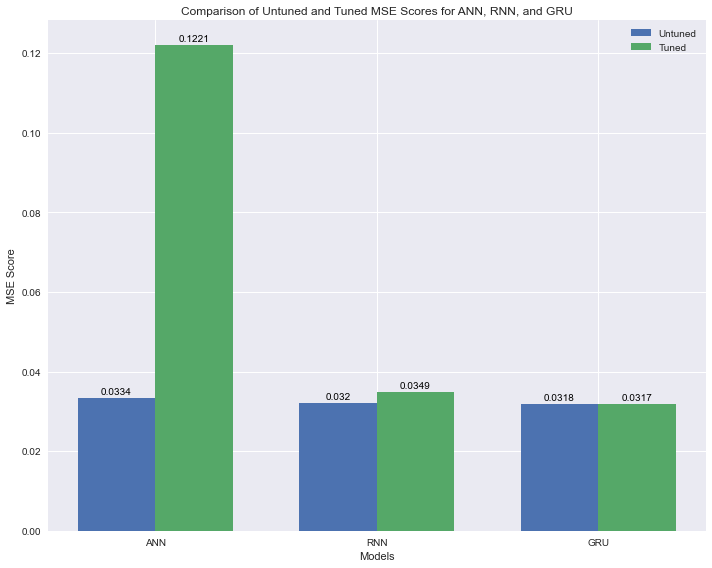

In [131]:
import numpy as np
import matplotlib.pyplot as plt

# Untuned MSE scores
untuned_mse = [ann_mse, rnn_mse, gru_mse]

# Tuned MSE scores
tuned_mse = [ann_tuned_mse, rnn_tuned_mse, gru_tuned_mse]

# Set the labels for the models
models = ['ANN', 'RNN', 'GRU']

# Set the width of the bars
bar_width = 0.35

# Set the x locations of the bars
index = np.arange(len(models))

# Plot the untuned and tuned MSE scores
plt.figure(figsize=(10, 8))
plt.bar(index, untuned_mse, bar_width, label='Untuned')
plt.bar(index + bar_width, tuned_mse, bar_width, label='Tuned')

# Add labels, title, and legend
plt.xlabel('Models')
plt.ylabel('MSE Score')
plt.title('Comparison of Untuned and Tuned MSE Scores for ANN, RNN, and GRU')
plt.xticks(index + bar_width/2, models)
plt.legend()

# Add score values on top of the bars
for i, v in enumerate(untuned_mse):
    plt.text(i, v + 0.001, str(round(v, 4)), color='black', ha='center')
    plt.text(i + bar_width, tuned_mse[i]+0.001, str(round(tuned_mse[i], 4)), color='black', ha='center')

# Show the plot
plt.tight_layout()
plt.show()